In [12]:
# DATA
import pandas as pd

total_data_mv= pd.read_csv(r'C:\Users\USER\Documents\repos\realestate-datacleanup-exercise\asteroid_prediction\Project\total_data_mv.csv')
total_data_mv.head(1)

,H,a,q,ad,n,tp_cal,per_y,moid,class_n
0,18.2,2.268877,1.952481,2.585274,0.288395,2.018092e+07,3.417628,0.968024,0


### **Arbol de decisión**

Se busca analizar la probabilidad que algunos de los asteriores en orbita con el sistema solar pueda tener un impacto con el planeta tierra, este análisis se le denomina MOID de sus siglas en ingles, "Minimum Orbit Intersection Distance" se procederán a desarrollar los modelos con el próposito de encontrar cual de ellos es mas consecuente con la variable objetivo

In [7]:
test_data = pd.read_csv("..\Project\clean_test.csv")
train_data = pd.read_csv("..\Project\clean_train.csv")

train_data.head(3)

,H,a,q,ad,n,tp_cal,per_y,class_n,moid
0,0.407666,0.912023,0.037829,0.001088,0.147871,0.532186,0.000176,0.0,1.03289
1,0.365854,0.912127,0.054196,0.001715,0.091676,0.532060,0.000284,0.0,1.89951
2,0.341463,0.912127,0.048251,0.001940,0.091424,0.528845,0.000285,0.0,1.67084


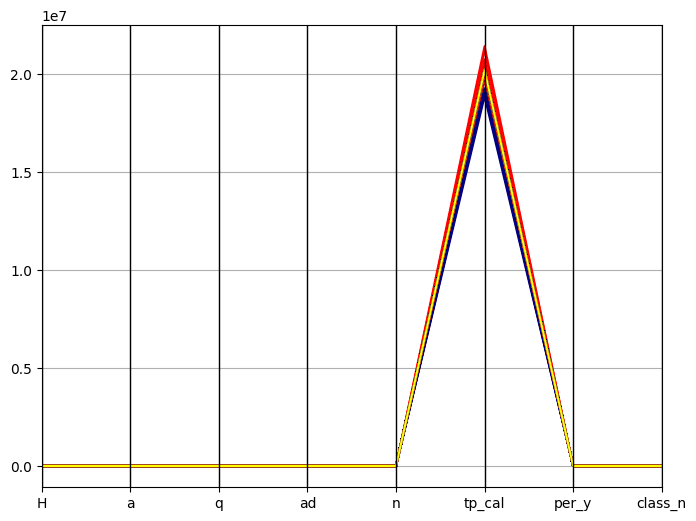

In [19]:
import matplotlib.pyplot as plt

# Existe un error de codigo con la base de datos original,la imagen generada es demasiado grande para ser procesada y visualizada, por lo que se graficara un muestra

# Seleccionar una muestra aleatoria de 10000 filas
sampled_data = total_data_mv.sample(n=10000, random_state=42)

plt.figure(figsize=(8, 6))
pd.plotting.parallel_coordinates(sampled_data, "moid", color=("red", "navy", "yellow"))
plt.legend([], [], frameon=False)  # Eliminar la leyenda
plt.show()


In [20]:
X_train = train_data.drop(["moid"], axis = 1)
y_train = train_data["moid"]
X_test = test_data.drop(["moid"], axis = 1)
y_test = test_data["moid"]

In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Convertir valores continuos a categorías discretas con 3 clases
y_train_discrete = pd.cut(y_train, bins=3, labels=["bajo", "medio", "alto"])
y_test_discrete = pd.cut(y_test, bins=3, labels=["bajo", "medio", "alto"])

# Crear y entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train_discrete)

# Predecir y evaluar
y_pred = model.predict(X_test)
print("Predicciones:", y_pred)

# Al utilizar el modelo de defecto "clasificador", arrojaba error ya que los valores eran continuos, se ha optimizado el modelo con una variable discreta que son especificas de este tipo de datos


Predicciones: ['bajo' 'bajo' 'bajo' ... 'bajo' 'bajo' 'bajo']


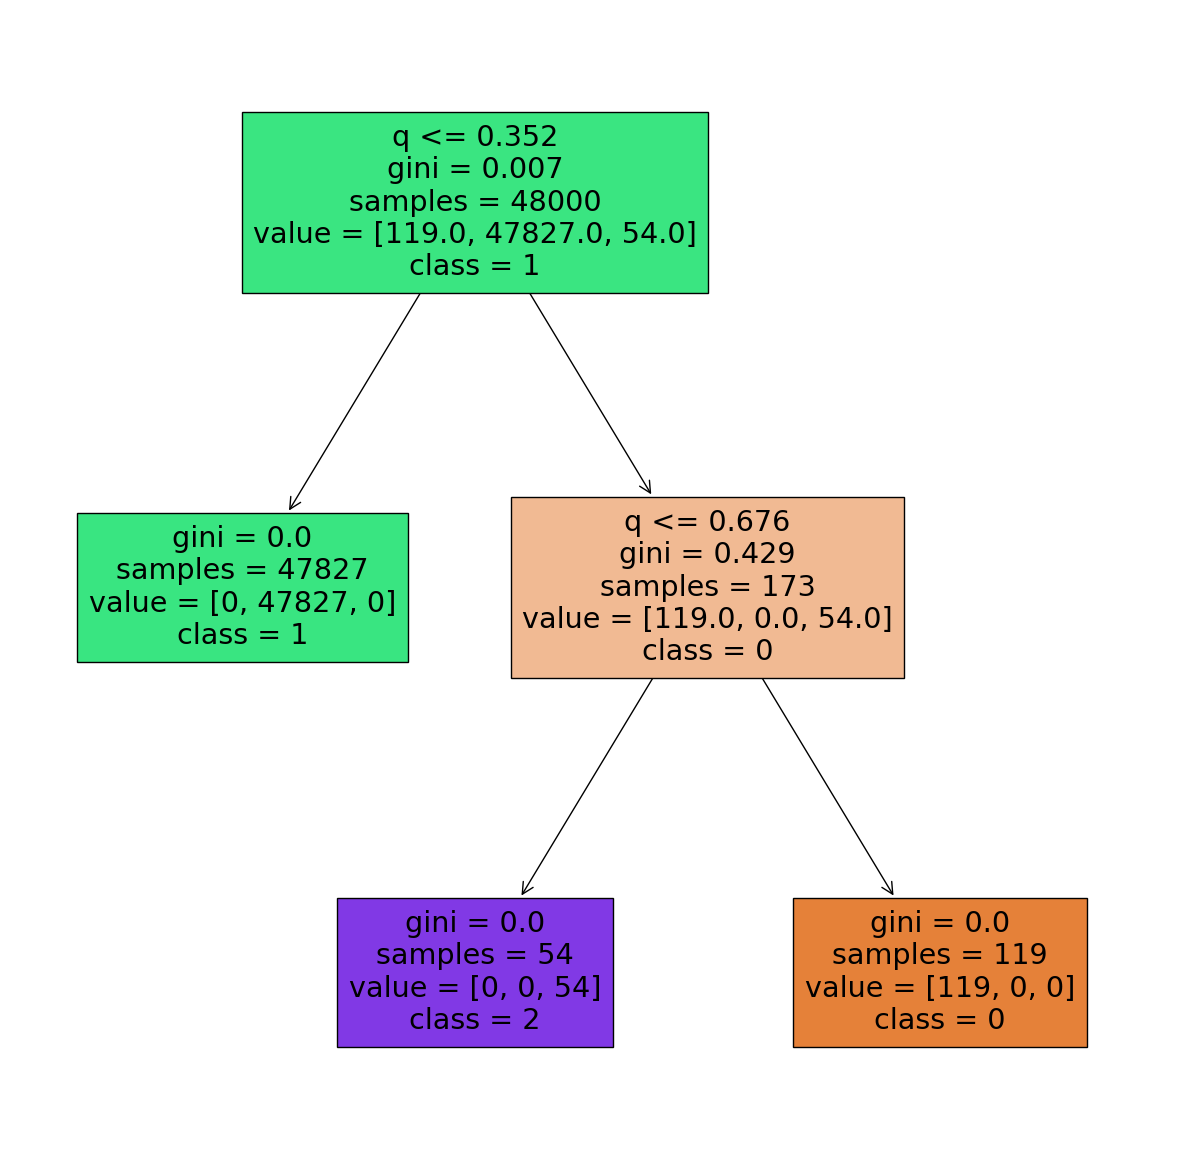

In [27]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [28]:
y_pred = model.predict(X_test)
y_pred

array(['bajo', 'bajo', 'bajo', ..., 'bajo', 'bajo', 'bajo'], dtype=object)

In [38]:
# Optimización del modelo 

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import warnings

# Función para suprimir advertencias
def warn(*args, **kwargs):
    pass

warnings.warn = warn

X = total_data_mv.drop(columns=["moid"])
y = total_data_mv["moid"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir valores continuos de MOID a categorías discretas con 3 clases
y_train_discrete = pd.cut(y_train, bins=3, labels=["bajo", "medio", "alto"])
y_test_discrete = pd.cut(y_test, bins=3, labels=["bajo", "medio", "alto"])

# Crear el modelo de DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Definir el grid de hiperparámetros a buscar
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Crear el GridSearchCV con validación cruzada de 5 pliegues
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train_discrete)

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid.best_params_}")

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test_discrete, y_pred)
print("Exactitud:", accuracy)



Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Exactitud: 0.99975


In [37]:
from sklearn.tree import DecisionTreeRegressor

# Crear un modelo de regresión de árbol de decisión
model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Crear un modelo de regresión de árbol de decisión
model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo (por ejemplo, calcular el error cuadrático medio)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")


Error cuadrático medio: 0.01180676365586987


In [43]:
import numpy as np

# Función para calcular "accuracy" para valores continuos
def accuracy_continuous(y_true, y_pred, tolerance=0.5):
    correct = np.abs(y_true - y_pred) <= tolerance
    return np.mean(correct)

# Ejemplo de uso
y_true = np.array([1.5, 2.0, 3.7, 4.1])
y_pred = np.array([1.7, 1.8, 3.6, 4.3])

acc = accuracy_continuous(y_true, y_pred, tolerance=0.5)
print(f"Accuracy score: {acc}")


Accuracy score: 1.0


### **Regresión lineal**

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): -0.8781074034366556
Coefficients (b1, b2): [-4.47399051e-04  3.33041613e-01  8.30730686e-01 -1.64647460e-01
  2.31042676e-01 -7.52397394e-09 -1.41449512e-04  1.08265770e-02]


In [46]:
y_pred = model.predict(X_test)
y_pred

array([1.09643014, 0.96742467, 0.7617644 , ..., 0.97142847, 0.17060072,
       1.50845939])

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 523.8487924571496
R2 Score: -159.66434861866043


Se descarta porqué para mejorar el modelo de predicción del MOID, sería deseable reducir el MSE y aumentar el R^2 Score hacia valores más cercanos a 1. Esto se podría lograr ajustando el modelo, considerando más características relevantes y/o aumentando la cantidad de datos de entrenamiento, también utilizando métodos de modelado más avanzados que puedan capturar mejor las relaciones en los datos del MOID.